In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
players_dataset = pd.read_csv('../datasets/t20_international_played_foreign_players_updated.csv')
ipl_dataset = pd.read_csv('../datasets/international_played_foreign_players_ipl_matches_details.csv')

In [3]:
players_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   player_id             310 non-null    int64 
 1   player_name           310 non-null    object
 2   country               310 non-null    object
 3   played_international  310 non-null    object
 4   bowling_style         291 non-null    object
 5   batting_style         310 non-null    object
 6   player_role           310 non-null    object
 7   played_t20i           310 non-null    object
dtypes: int64(1), object(7)
memory usage: 19.5+ KB


In [4]:
ipl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Bat1        8569 non-null   object
 1   Wkts        8569 non-null   object
 2   Conc        8569 non-null   object
 3   Ct          8569 non-null   object
 4   St          8569 non-null   object
 5   Opposition  8569 non-null   object
 6   Ground      8569 non-null   object
 7   Start Date  8569 non-null   object
 8   match_link  8569 non-null   object
 9   player_id   8569 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 669.6+ KB


In [5]:
ipl_dataset['Start Date'] = pd.to_datetime(ipl_dataset['Start Date'], format="%d-%b-%y", errors='coerce')

In [6]:
# Create a new column 'IPL Season' by extracting the year from 'Start Date'
ipl_dataset['IPL Season'] = ipl_dataset['Start Date'].dt.year

    Season  Player Count
0     2008            65
1     2009            60
2     2010            68
3     2011            71
4     2012            68
5     2013            72
6     2014            58
7     2015            56
8     2016            63
9     2017            60
10    2018            58
11    2019            60
12    2020            55
13    2021            66
14    2022            67
15    2023            72
16    2024            72


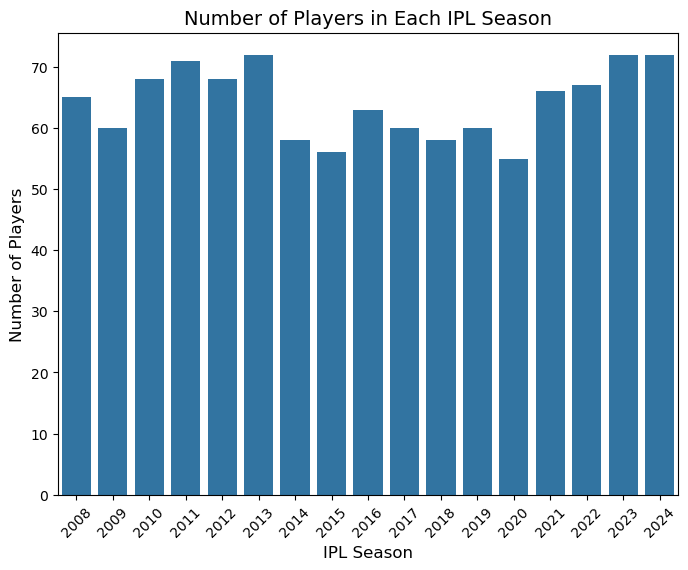

In [7]:
# Group by 'IPL Season' and count foreign players per ipl season
players_per_season = ipl_dataset.groupby('IPL Season')['player_id'].nunique()

# Convert Series to DataFrame for visualization
players_per_season_df = players_per_season.reset_index()
players_per_season_df.columns = ['Season', 'Player Count']
print(players_per_season_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=players_per_season_df, x='Season', y='Player Count',color='#1f77b4')
plt.title('Number of Players in Each IPL Season', fontsize=14)
plt.xlabel('IPL Season', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
# Merge datasets on 'player_id'
merged_df = ipl_dataset.merge(players_dataset, on='player_id', how='left')

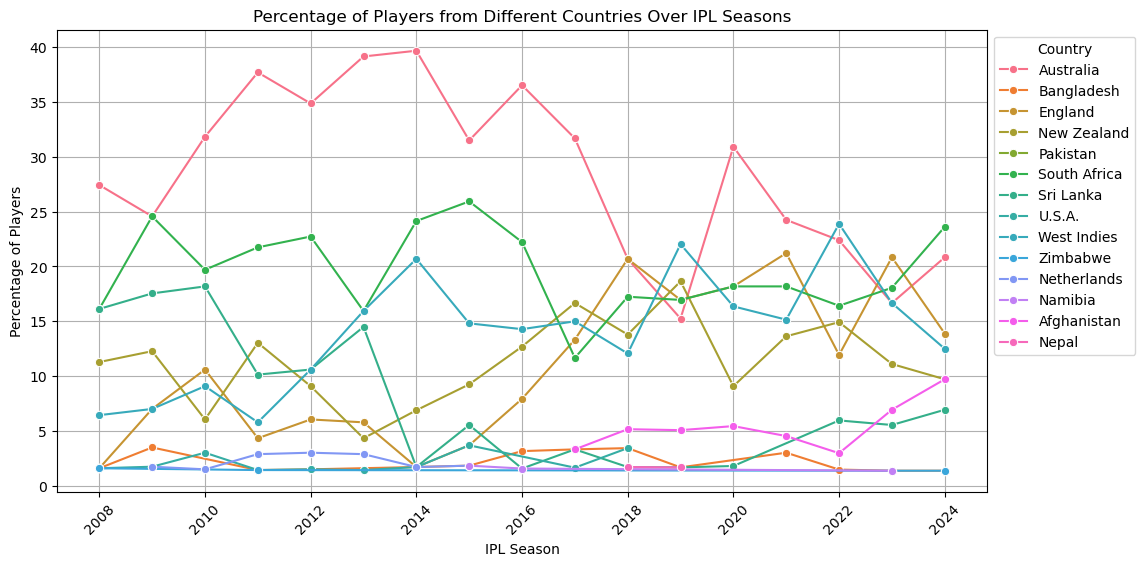

In [24]:
# Count of players from each country per season
players_by_country = merged_df.groupby(['IPL Season', 'country'])['player_id'].nunique().reset_index()

# Calculate total players per season
total_players_per_season = players_by_country.groupby('IPL Season')['player_id'].transform('sum')

# Calculate percentages
players_by_country['percentage'] = (players_by_country['player_id'] / total_players_per_season) * 100

# Visualization with percentages
plt.figure(figsize=(12, 6))
sns.lineplot(data=players_by_country, x='IPL Season', y='percentage', hue='country', marker='o')
plt.title("Percentage of Players from Different Countries Over IPL Seasons")
plt.xlabel("IPL Season")
plt.ylabel("Percentage of Players")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


In [ ]:
# Define a categorical color palette with distinct colors
palette = sns.color_palette("tab20")  # Alternatives: "Set3", "Paired", "Dark2", "tab20"

C:\Users\hcham\AppData\Local\Temp\ipykernel_8460\1177574602.py:6: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=players_by_country, x='IPL Season', y='player_id', hue='country', marker='o',palette=palette)


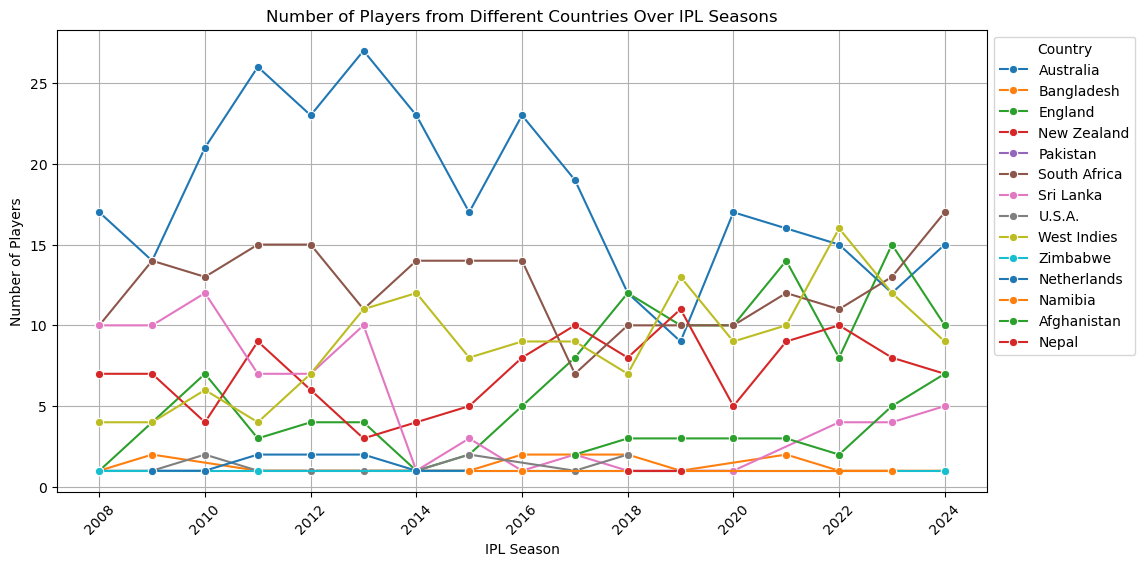

In [25]:
# Count of players from each country per season
players_by_country = merged_df.groupby(['IPL Season', 'country'])['player_id'].nunique().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=players_by_country, x='IPL Season', y='player_id', hue='country', marker='o',palette=palette)
plt.title("Number of Players from Different Countries Over IPL Seasons")
plt.xlabel("IPL Season")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


In [17]:
# Count player roles per season
role_counts = merged_df.groupby(['IPL Season', 'player_role']).size().reset_index(name='count')

# Calculate percentages correctly
total_counts = role_counts.groupby('IPL Season')['count'].transform('sum')  # Get total players per season
role_counts['percentage'] = (role_counts['count'] / total_counts) * 100  # Compute percentages

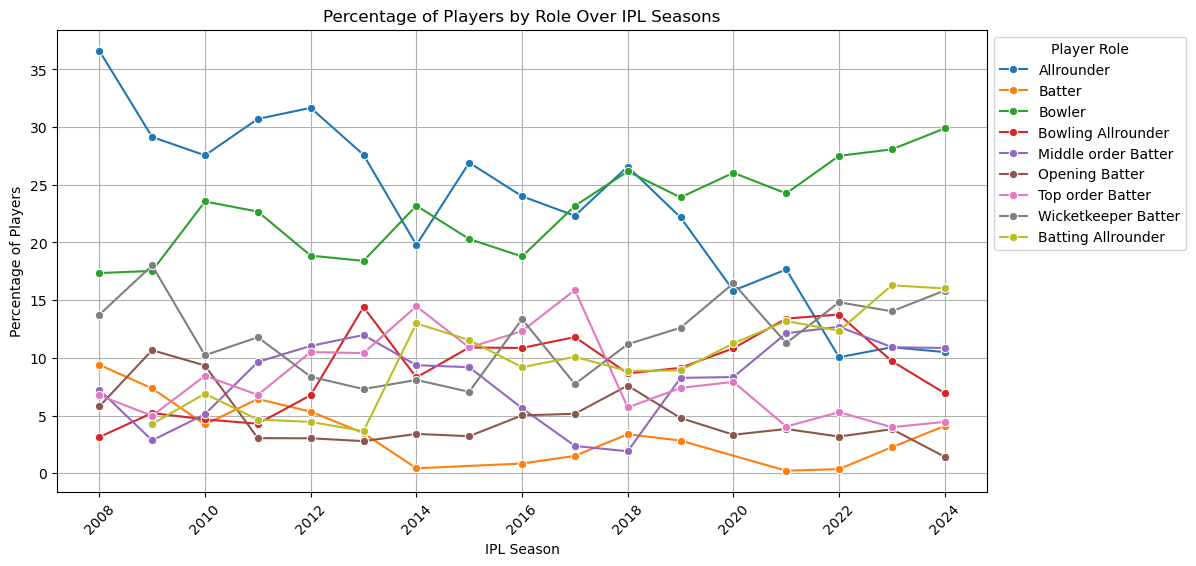

In [21]:
# Visualization using percentages
plt.figure(figsize=(12, 6))
sns.lineplot(data=role_counts, x='IPL Season', y='percentage', hue='player_role', marker='o')

plt.title("Percentage of Players by Role Over IPL Seasons")
plt.xlabel("IPL Season")
plt.ylabel("Percentage of Players")
plt.xticks(rotation=45)
plt.legend(title="Player Role", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


In [22]:
# Define a categorical color palette with distinct colors
palette = sns.color_palette("tab10")  # Alternatives: "Set3", "Paired", "Dark2", "tab20"

C:\Users\hcham\AppData\Local\Temp\ipykernel_8460\1128905810.py:6: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.lineplot(data=players_by_role, x='IPL Season', y='player_id', hue='player_role', marker='o',palette=palette)


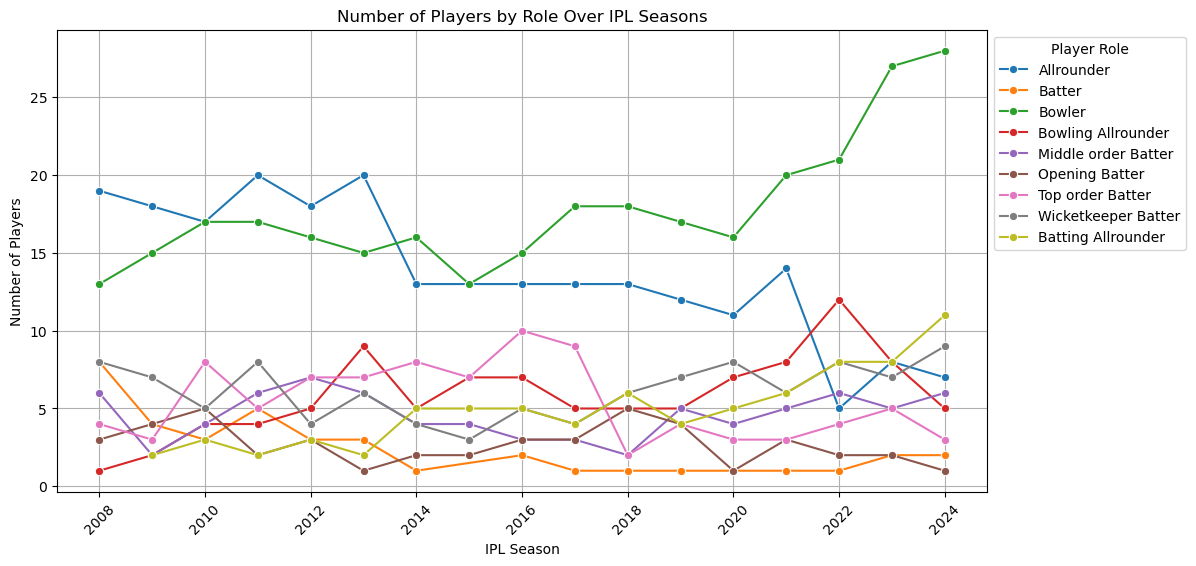

In [23]:
# Count of players by role per season
players_by_role = merged_df.groupby(['IPL Season', 'player_role'])['player_id'].nunique().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=players_by_role, x='IPL Season', y='player_id', hue='player_role', marker='o',palette=palette)
plt.title("Number of Players by Role Over IPL Seasons")
plt.xlabel("IPL Season")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.legend(title="Player Role", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

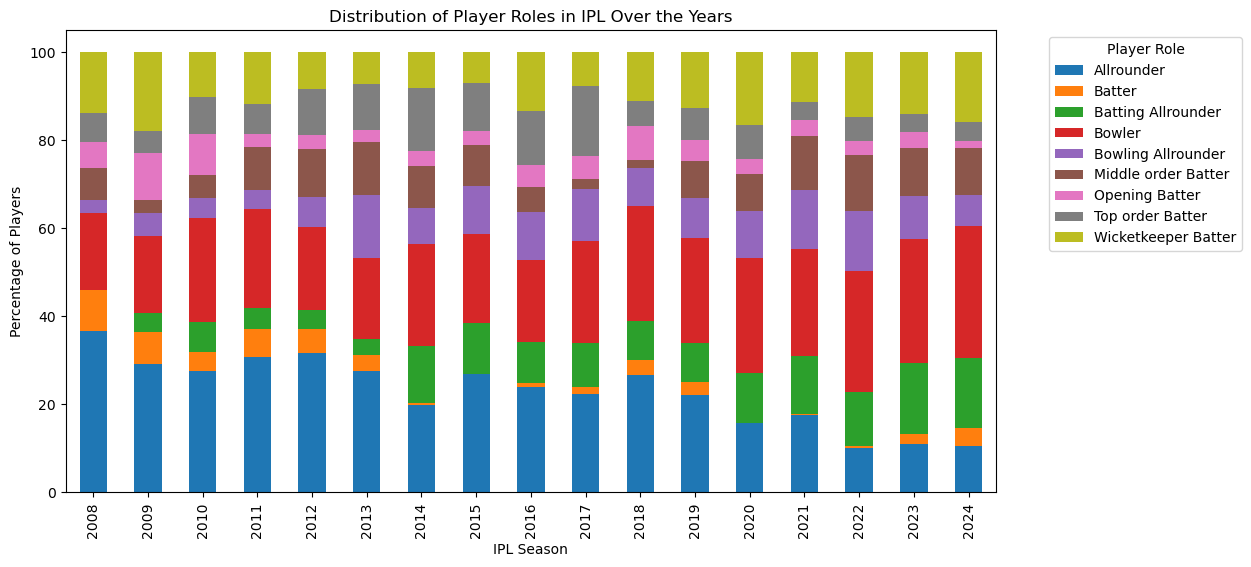

In [20]:


# Pivot table for stacked bar plot
pivot_df = role_counts.pivot(index='IPL Season', columns='player_role', values='percentage')

# Plot using manually assigned colors
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=palette[:len(pivot_df.columns)])

plt.xlabel("IPL Season")
plt.ylabel("Percentage of Players")
plt.title("Distribution of Player Roles in IPL Over the Years")
plt.legend(title="Player Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()